## I. Loading and Inspecting Data

In [1]:
import pandas as pd

In [2]:
birddata = pd.read_csv("bird_tracking.csv")

In [3]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [4]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


## II. Simple data visualisations

In [5]:
import matplotlib.pyplot as plt
import numpy as np

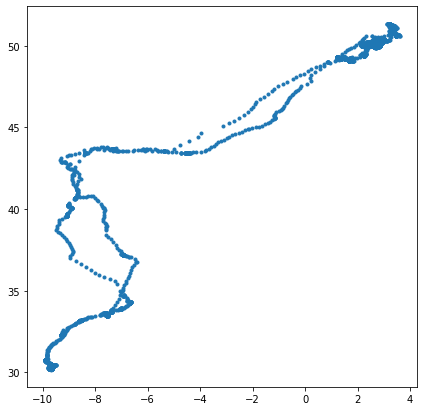

In [6]:
ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x, y, ".")
plt.show()

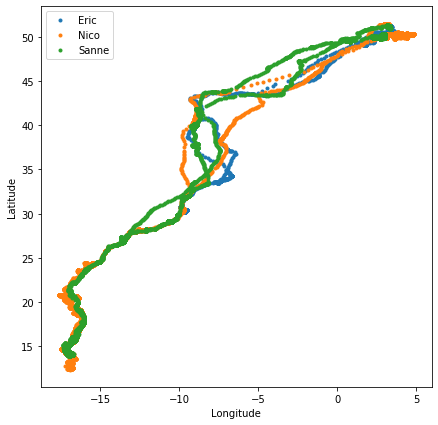

In [7]:
birds = birddata.bird_name.unique()
plt.figure(figsize=(7,7))

for bird in birds:
    ix = birddata.bird_name == bird
    x, y = birddata.longitude[ix], birddata.latitude[ix]    
    plt.plot(x, y, ".", label=bird)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

## III. Examining Flight Speed

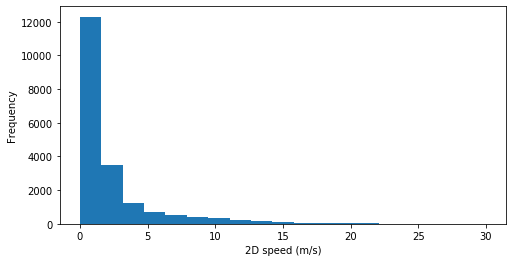

In [8]:
plt.figure(figsize=(8,4))
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20))
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

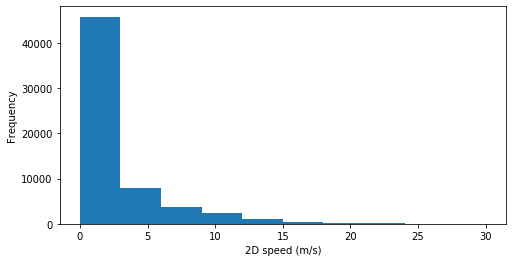

In [9]:
# histogram using pandas
plt.figure(figsize=(8,4))
birddata.speed_2d.plot(kind='hist', range=[0, 30])
plt.xlabel("2D speed (m/s)")
plt.show()

The benefit of using pandas for plotting is that we don't have to explicitly deal with NaN values.

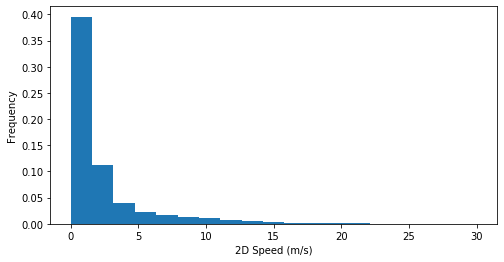

In [10]:
plt.figure(figsize=(8,4))
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), density=True)
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

## IV. Using Datetime

In [11]:
import datetime

In [12]:
timestamps = []
for i in range(len(birddata)):
    ts = datetime.datetime.strptime(birddata.date_time[i][:-3], "%Y-%m-%d %H:%M:%S")
    timestamps.append(ts)

In [13]:
birddata["timestamps"] = timestamps

In [14]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [15]:
# Calculating time elapsed since the beginning of the data collection
times = birddata.timestamps[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

In [16]:
elapsed_time[-1]

Timedelta('258 days 23:33:21')

In [17]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [18]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [19]:
elapsed_time[1000] / datetime.timedelta(days=1)

12.084722222222222

In [20]:
elapsed_time[1000] / datetime.timedelta(hours=1)

290.03333333333336

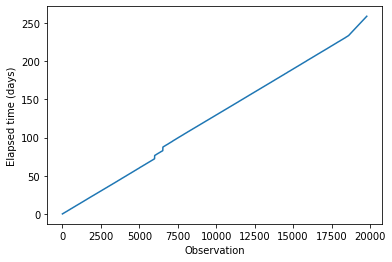

In [21]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.show()

## V. Calculating Daily Mean Speed

In [22]:
data = birddata[birddata.bird_name == "Eric"]

In [23]:
times = data.timestamps

In [24]:
elapsed_time = [time - times[0] for time in times]

In [25]:
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

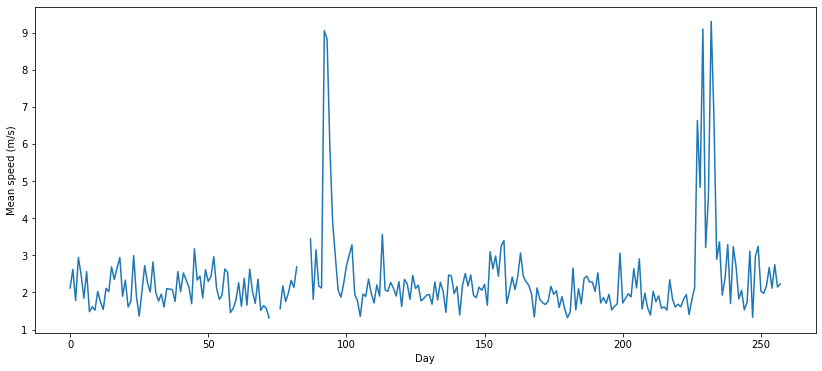

In [26]:
next_day = 1
inds = []
daily_mean_speed = []

for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        # compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

plt.figure(figsize=(14,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.show()

Looking at the plot, we see that there are 2 periods within the observation window during which Eric travels substantially more. These are the periods that correspond to his migration patterns.

## VI. Using the Cartopy library

In [27]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [28]:
proj = ccrs.Mercator()

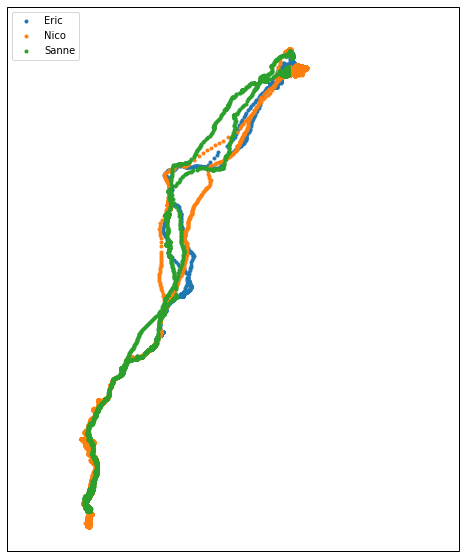

In [29]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))

for name in birddata.bird_name.unique():
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)

plt.legend(loc="upper left")
plt.show()

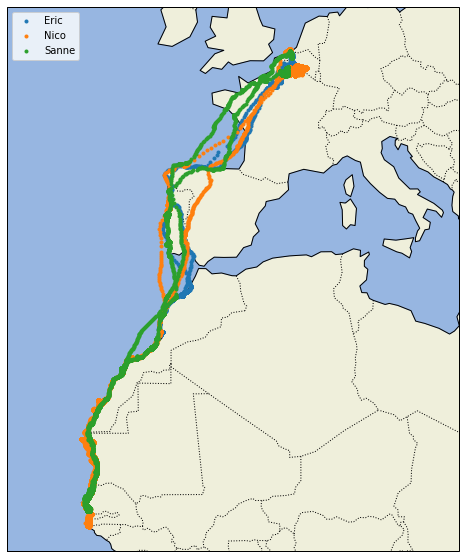

In [30]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

for name in birddata.bird_name.unique():
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)

plt.legend(loc="upper left")
plt.show()